In [229]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [230]:
data = pd.read_csv("./datasets/titanic/train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

Find the number of observations and features given

In [231]:
data.shape

(891, 11)

A few observatations:
 1. We're missing some enteries on Age, Cabin, and embarked.  We'll either need to fill the missing values or drop the feature
 2. Name, Sex, Ticket, Cabin and Embarked will need to be encoded

In [232]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [233]:
class_data = data[["Sex", "Pclass", "Survived"]]
totals = [x for x in class_data.groupby("Pclass").count()['Sex']]
totalclass_data = class_data.groupby(["Pclass", "Sex"])["Sex"].count()
gender_survival_perclass = class_data.groupby(["Pclass", "Sex"])["Survived"].sum()

men_Total = [totalclass_data[x]["male"] for x in range(1,4)]
women_Total = [totalclass_data[x]["female"] for x in range(1,4)]
men_Survived = [gender_survival_perclass[x]["male"] for x in range(1,4)]
women_Survived = [gender_survival_perclass[x]["female"] for x in range(1,4)]

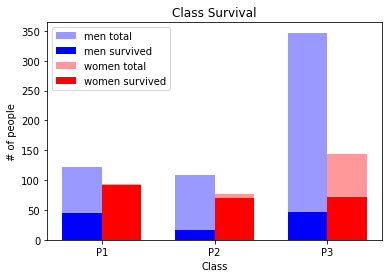

In [234]:
fig, ax = plt.subplots()
index = np.arange(3)
opacity = 0.4
bar_width = 0.35

plt.bar(index, men_Total, bar_width, color="b", alpha=opacity, label="men total")
plt.bar(index, men_Survived, bar_width, color="b", label="men survived")
plt.bar(index+bar_width, women_Total, bar_width, color="r", alpha=opacity, label="women total")
plt.bar(index+bar_width, women_Survived, bar_width, color="r", label="women survived")

plt.legend()
plt.xticks(index+(bar_width/2), ["P1", "P2", "P3"])
plt.xlabel("Class")
plt.ylabel("# of people")
plt.title("Class Survival")
plt.show()

# TODO NAME

# TODO SIB/SP

# TODO PAR/CH

From history we know women, children and the wealthy were most likely to survive.  Let's see if the data confirms this.  Absolutely

Text(0.5,1,'male vs female survival')

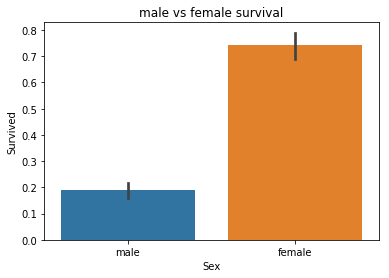

In [235]:
sns.barplot("Sex", "Survived", data=data).set_title("male vs female survival")

Encode the male and female data

In [236]:
data["Sex"].replace(0, "female", inplace=True)
data["Sex"].replace(1, "male", inplace=True)

# TODO AGE

Ticket data is not easily organizable so let's drop it

In [237]:
data.drop("Ticket", axis=1, inplace=True)

# TODO FARE

Does having an assigned cabin affect your chance of survival? Seems likely.

Text(0.5,1,'surival rate by assigned cabin')

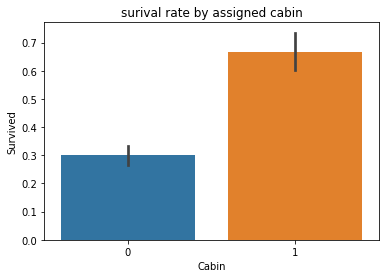

In [238]:
data["Cabin"] = data["Cabin"].notnull().astype('int')
sns.barplot("Cabin", "Survived", data=data).set_title("surival rate by assigned cabin")

The data shows that almost everyone embarked from S so we will just fill the 2 missing values with S

In [239]:
data.groupby("Embarked").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
Embarked,,,,,,,,,
C,168,168,168,168,130,168,168,168,168
Q,77,77,77,77,28,77,77,77,77
S,644,644,644,644,554,644,644,644,644


In [240]:
print(data["Embarked"].count())
data["Embarked"] = data["Embarked"].fillna('S')
print(data["Embarked"].count())

889
891


Text(0.5,1,'port of embarkation survival rate')

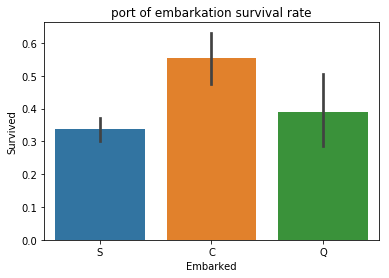

In [241]:
sns.barplot("Embarked", "Survived", data=data).set_title("port of embarkation survival rate")

Could this be because people at port C paid more for their tickets and people at port S paid the least?  Doesn't look like it.

In [242]:
fp = data.groupby("Embarked").Fare
pd.DataFrame(data={"avg": fp.mean(), "std": fp.std(), "min": fp.min(), "max": fp.max()})

,avg,max,min,std
Embarked,,,,
C,59.954144,512.3292,4.0125,83.912994
Q,13.276030,90.0000,6.7500,14.188047
S,27.243651,263.0000,0.0000,35.952905


In [243]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

NameError: name 'X' is not defined